In [1]:
import os
import numpy as np

In [2]:
def load_npz_data(folder_path):
    oct_images, slo_images, glaucoma_labels, race_labels = [], [], [], []
    
    for file in os.listdir(folder_path):
        if file.endswith(".npz"):
            data = np.load(os.path.join(folder_path, file))
            
            oct_image = np.repeat(data['oct_fundus'][:, :, np.newaxis], 3, axis=-1)
            slo_image = np.repeat(data['slo_fundus'][:, :, np.newaxis], 3, axis=-1)
            glaucoma_label = data['glaucoma']
            race_label = data['race']
            
            # Append the image data and labels
            oct_images.append(oct_image)
            slo_images.append(slo_image)
            glaucoma_labels.append(glaucoma_label)
            race_labels.append(race_label)
    
    oct_images = np.array(oct_images) / 255.0  # Normalize image data
    slo_images = np.array(slo_images) / 255.0  # Normalize image data
    glaucoma_labels = np.expand_dims(np.array(glaucoma_labels), axis=-1)  # Shape (num_samples, 1)
    race_labels = np.expand_dims(np.array(race_labels), axis=-1)  # Shape (num_samples, 1)
    
    # Return image data, labels, and race labels
    return oct_images, slo_images, glaucoma_labels, race_labels

In [3]:
# Load training and testing data, including race
train_oct, train_slo, train_glaucoma_labels, train_race_lables = load_npz_data('C:\\Rakshya\\ULL\\First Semester\\Data Mining\\fairdomain-20241031T021302Z-001\\fairdomain\\Training')
test_oct, test_slo, test_glaucoma_labels, test_race_labels = load_npz_data('C:\\Rakshya\\ULL\\First Semester\\Data Mining\\fairdomain-20241031T021302Z-001\\fairdomain\\Testing')


In [4]:
print("Train OCT Images shape: ", train_oct.shape)
print("Train SLO Images shape: ", train_slo.shape)
print("Train Glaucoma Labels: ", train_glaucoma_labels.shape)
print("Train race labels: ",train_race_lables.shape)
print("Test OCT Images shape: ", test_oct.shape)
print("Test SLO Images shape: ", test_slo.shape)
print("Test Glaucoma Labels: ", test_glaucoma_labels.shape)
print("Test race labels: ",test_race_labels.shape)


Train OCT Images shape:  (3000, 224, 224, 3)
Train SLO Images shape:  (3000, 224, 224, 3)
Train Glaucoma Labels:  (3000, 1)
Train race labels:  (3000, 1)
Test OCT Images shape:  (2000, 224, 224, 3)
Test SLO Images shape:  (2000, 224, 224, 3)
Test Glaucoma Labels:  (2000, 1)
Test race labels:  (2000, 1)


In [5]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Input, Dense, GlobalAveragePooling2D, Concatenate, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam

In [6]:
# OCT Input
input_oct = Input(shape=(224, 224, 3), name='oct_input')
base_resnet_oct = ResNet50(include_top=False, weights='imagenet', input_tensor=input_oct)
base_resnet_oct.trainable = False  # Freeze the ResNet weights
for layer in base_resnet_oct.layers:
    layer.name = layer.name + "_oct"
    print(layer.name)
# Unfreeze the last 20 layers for fine-tuning
for layer in base_resnet_oct.layers[-20:]:
    layer.trainable = True
x1 = GlobalAveragePooling2D()(base_resnet_oct.output)

oct_input_oct
conv1_pad_oct
conv1_conv_oct
conv1_bn_oct
conv1_relu_oct
pool1_pad_oct
pool1_pool_oct
conv2_block1_1_conv_oct
conv2_block1_1_bn_oct
conv2_block1_1_relu_oct
conv2_block1_2_conv_oct
conv2_block1_2_bn_oct
conv2_block1_2_relu_oct
conv2_block1_0_conv_oct
conv2_block1_3_conv_oct
conv2_block1_0_bn_oct
conv2_block1_3_bn_oct
conv2_block1_add_oct
conv2_block1_out_oct
conv2_block2_1_conv_oct
conv2_block2_1_bn_oct
conv2_block2_1_relu_oct
conv2_block2_2_conv_oct
conv2_block2_2_bn_oct
conv2_block2_2_relu_oct
conv2_block2_3_conv_oct
conv2_block2_3_bn_oct
conv2_block2_add_oct
conv2_block2_out_oct
conv2_block3_1_conv_oct
conv2_block3_1_bn_oct
conv2_block3_1_relu_oct
conv2_block3_2_conv_oct
conv2_block3_2_bn_oct
conv2_block3_2_relu_oct
conv2_block3_3_conv_oct
conv2_block3_3_bn_oct
conv2_block3_add_oct
conv2_block3_out_oct
conv3_block1_1_conv_oct
conv3_block1_1_bn_oct
conv3_block1_1_relu_oct
conv3_block1_2_conv_oct
conv3_block1_2_bn_oct
conv3_block1_2_relu_oct
conv3_block1_0_conv_oct
conv3_

In [7]:
# SLO Input
input_slo = Input(shape=(224, 224, 3), name='slo_input')
base_resnet_slo = ResNet50(include_top=False, weights='imagenet', input_tensor=input_slo)
base_resnet_slo.trainable = False  # Freeze the ResNet weights
for layer in base_resnet_slo.layers:
    layer.name = layer.name + "_slo"
    print(layer.name)
# Unfreeze the last 20 layers for fine-tuning
for layer in base_resnet_slo.layers[-20:]:
    layer.trainable = True
x2 = GlobalAveragePooling2D()(base_resnet_slo.output)

slo_input_slo
conv1_pad_slo
conv1_conv_slo
conv1_bn_slo
conv1_relu_slo
pool1_pad_slo
pool1_pool_slo
conv2_block1_1_conv_slo
conv2_block1_1_bn_slo
conv2_block1_1_relu_slo
conv2_block1_2_conv_slo
conv2_block1_2_bn_slo
conv2_block1_2_relu_slo
conv2_block1_0_conv_slo
conv2_block1_3_conv_slo
conv2_block1_0_bn_slo
conv2_block1_3_bn_slo
conv2_block1_add_slo
conv2_block1_out_slo
conv2_block2_1_conv_slo
conv2_block2_1_bn_slo
conv2_block2_1_relu_slo
conv2_block2_2_conv_slo
conv2_block2_2_bn_slo
conv2_block2_2_relu_slo
conv2_block2_3_conv_slo
conv2_block2_3_bn_slo
conv2_block2_add_slo
conv2_block2_out_slo
conv2_block3_1_conv_slo
conv2_block3_1_bn_slo
conv2_block3_1_relu_slo
conv2_block3_2_conv_slo
conv2_block3_2_bn_slo
conv2_block3_2_relu_slo
conv2_block3_3_conv_slo
conv2_block3_3_bn_slo
conv2_block3_add_slo
conv2_block3_out_slo
conv3_block1_1_conv_slo
conv3_block1_1_bn_slo
conv3_block1_1_relu_slo
conv3_block1_2_conv_slo
conv3_block1_2_bn_slo
conv3_block1_2_relu_slo
conv3_block1_0_conv_slo
conv3_

In [8]:
# Combine the outputs of both branches
combined = Concatenate()([x1, x2])
x = Dense(1024, activation='relu')(combined)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

In [9]:
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

In [10]:
x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)

In [11]:
# Glaucoma Output (binary classification)
output = Dense(1, activation='sigmoid', name='glaucoma_output')(x)

In [12]:
model = Model(inputs=[input_oct, input_slo], outputs=output)
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [13]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ oct_input_oct       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ slo_input_slo       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad_oct       │ (None, 230, 230,  │          0 │ oct_input_oct[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad_slo       │ (None, 230, 230,  │          0 │ slo_input_slo[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv_oct      │ (None, 112, 112,  │      9,472 │ conv1_pad_oct[0]… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv_slo      │ (None, 112, 112,  │      9,472 │ conv1_pad_slo[0]… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn_oct        │ (None, 112, 112,  │        256 │ conv1_conv_oct[0… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn_slo        │ (None, 112, 112,  │        256 │ conv1_conv_slo[0… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu_oct      │ (None, 112, 112,  │          0 │ conv1_bn_oct[0][… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu_slo      │ (None, 112, 112,  │          0 │ conv1_bn_slo[0][… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad_oct       │ (None, 114, 114,  │          0 │ conv1_relu_oct[0… │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad_slo       │ (None, 114, 114,  │          0 │ conv1_relu_slo[0… │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool_oct      │ (None, 56, 56,    │          0 │ pool1_pad_oct[0]… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool_slo      │ (None, 56, 56,    │          0 │ pool1_pad_slo[0]… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_con… │ (None, 56, 56,    │      4,160 │ pool1_pool_oct[0… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_con… │ (None, 56, 56,    │      4,160 │ pool1_pool_slo[0… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn_… │ (None, 56, 56,    │        256 │ conv2_block1_1_c

 Total params: 52,034,305 (198.50 MB)

 Trainable params: 22,717,953 (86.66 MB)

 Non-trainable params: 29,316,352 (111.83 MB)

In [15]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Learning rate scheduler
lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=5,
    min_lr=1e-6,
    verbose=1
)


In [16]:
history = model.fit(
    [train_oct, train_slo],            
    train_glaucoma_labels,
    validation_data=([test_oct, test_slo], test_glaucoma_labels),
    epochs=30,
    callbacks=[lr_scheduler]
)

Epoch 1/30


c:\Users\Rakshya\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['oct_input', 'slo_input']. Received: the structure of inputs=('*', '*')
  warnings.warn(


94/94 ━━━━━━━━━━━━━━━━━━━━ 270s 3s/step - accuracy: 0.5895 - loss: 0.8584 - val_accuracy: 0.5565 - val_loss: 0.6830 - learning_rate: 1.0000e-04
Epoch 2/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 243s 3s/step - accuracy: 0.5909 - loss: 0.8224 - val_accuracy: 0.5565 - val_loss: 0.7083 - learning_rate: 1.0000e-04
Epoch 3/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 242s 3s/step - accuracy: 0.6280 - loss: 0.7788 - val_accuracy: 0.6300 - val_loss: 0.6625 - learning_rate: 1.0000e-04
Epoch 4/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 243s 3s/step - accuracy: 0.6502 - loss: 0.7387 - val_accuracy: 0.5565 - val_loss: 0.8834 - learning_rate: 1.0000e-04
Epoch 5/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 242s 3s/step - accuracy: 0.6593 - loss: 0.6807 - val_accuracy: 0.5570 - val_loss: 0.9818 - learning_rate: 1.0000e-04
Epoch 6/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 242s 3s/step - accuracy: 0.6529 - loss: 0.6941 - val_accuracy: 0.4530 - val_loss: 1.5328 - learning_rate: 1.0000e-04
Epoch 7/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 241s 3s/step - accuracy: 0.6700 - loss: 0.6

In [17]:
test_loss, test_accuracy = model.evaluate([test_oct, test_slo], test_glaucoma_labels)
print(f'Test Accuracy: {test_accuracy}')
print(f'Test Loss: {test_loss}')

63/63 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - accuracy: 0.6852 - loss: 0.6921
Test Accuracy: 0.6869999766349792
Test Loss: 0.6877080798149109


In [18]:
train_loss, train_accuracy = model.evaluate([train_oct, train_slo], train_glaucoma_labels)
print(f'Train Accuracy: {train_accuracy}')
print(f'Train Loss: {train_loss}')

94/94 ━━━━━━━━━━━━━━━━━━━━ 125s 1s/step - accuracy: 0.8387 - loss: 0.3727
Train Accuracy: 0.8286666870117188
Train Loss: 0.3889000713825226


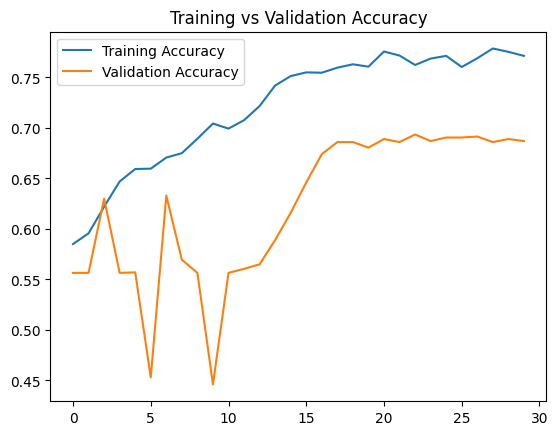

In [19]:
import matplotlib.pyplot as plt

# Assuming you have training history from model.fit()
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()

In [20]:
from sklearn.metrics import roc_auc_score

In [27]:
y_pred_prob_test = model.predict([test_oct,test_slo]) 

63/63 ━━━━━━━━━━━━━━━━━━━━ 97s 2s/step


In [28]:
y_pred_prob_train = model.predict([train_oct,train_slo]) 

94/94 ━━━━━━━━━━━━━━━━━━━━ 138s 1s/step


In [29]:
overall_test_auc = roc_auc_score(test_glaucoma_labels, y_pred_prob_test)
overall_train_auc = roc_auc_score(train_glaucoma_labels, y_pred_prob_train)
print(f'Overall Test AUC: {overall_test_auc:.4f}')
print(f'Overall Train AUC: {overall_train_auc:.4f}')

Overall Test AUC: 0.7351
Overall Train AUC: 0.9038


In [23]:
races = np.unique(test_race_labels)
races

array([0, 1, 2])

In [24]:
race_auc_scores = {}

In [33]:
for r in races:
    race_indices = np.where(test_race_labels == r)
    
    # Extract test labels and predicted probabilities for the current race
    race_labels = test_glaucoma_labels[race_indices]
    race_pred_prob = y_pred_prob_test[race_indices]
    
    # Calculate AUC for the current race
    race_auc = roc_auc_score(race_labels, race_pred_prob)
    race_auc_scores[r] = race_auc
    print(f'Test AUC for {r}: {race_auc:.4f}')

Test AUC for 0: 0.7712
Test AUC for 1: 0.7231
Test AUC for 2: 0.7270


In [32]:
race_auc_scores

{np.int64(0): np.float64(0.771245186136072),
 np.int64(1): np.float64(0.7230982415902141),
 np.int64(2): np.float64(0.7269914593416926)}

In [34]:
import matplotlib.pyplot as plt

race_labels = ['Asian', 'Black', 'White']  
auc_values = list(race_auc_scores.values())

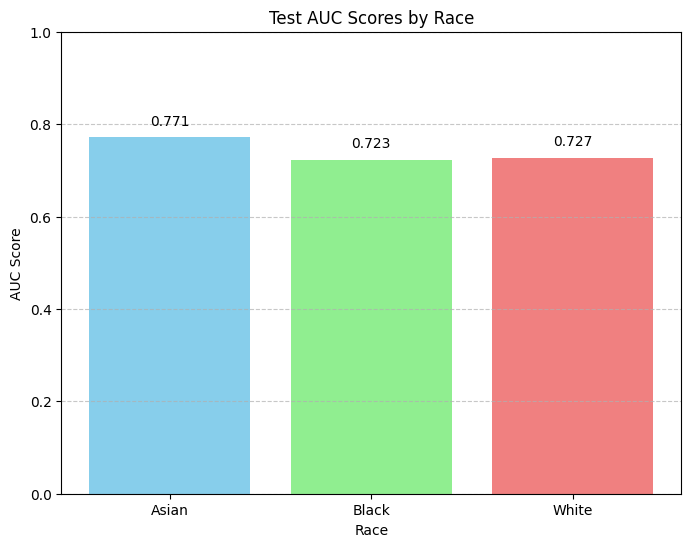

In [35]:
plt.figure(figsize=(8, 6))
plt.bar(race_labels, auc_values, color=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Test AUC Scores by Race')
plt.xlabel('Race')
plt.ylabel('AUC Score')
plt.ylim(0, 1)  # AUC ranges from 0 to 1
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add values on top of bars
for i, auc in enumerate(auc_values):
    plt.text(i, auc + 0.02, f'{auc:.3f}', ha='center', va='bottom', fontsize=10)

plt.show()